<a href="https://colab.research.google.com/github/aveek06kundu/BigData_PySpark01_ALY6110/blob/main/Module5_Assignment_Lab_Aveek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install Java and Spark

# %% [code]
# Install Java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Download Spark
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# Unzip Spark
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# Set environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

# Install findspark
!pip install -q findspark


In [ ]:
#Initialize Spark

# %% [code]
import findspark
findspark.init()
from pyspark.sql import SparkSession

# Create SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()


In [ ]:
#Verify Spark Installation


# %% [code]
# Check Spark version
spark.version

# Output should be '3.0.0'

# %% [code]
# Print Spark Context information
print(spark.sparkContext)
print("Spark App Name : "+ spark.sparkContext.appName)


<SparkContext master=local appName=ALY6110_App>
Spark App Name : ALY6110_App


In [ ]:
#Create and Use Spark Context

# %% [code]
# Stop the existing SparkContext
spark.sparkContext.stop()

# %% [code]
# Create new SparkContext
from pyspark import SparkContext
sc = SparkContext("local", "ALY6110_App")
print(sc.appName)


ALY6110_App


In [ ]:
#Task 2:

#Reading the BostonHousing dataset in PySpark


# Import necessary libraries
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("BostonHousingAnalysis").getOrCreate()

# Load the dataset (assuming it's available as a CSV in a specific path)
# If you're running this in Colab, you may need to upload the dataset first

# Upload the file if using Google Colab
from google.colab import files
uploaded = files.upload()

# Assuming the file name is BostonHousing.csv
filename = list(uploaded.keys())[0]

# Load the dataset into a PySpark DataFrame
df = spark.read.csv(filename, header=True, inferSchema=True)

# Show the first few rows of the dataframe to verify
df.show(5)

Saving BostonHousing.csv to BostonHousing (2).csv
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [ ]:
#Task 3: Combine Features into a Single Vector Column using Vector Assembler

from pyspark.ml.feature import VectorAssembler

# Select columns other than the target column 'medv'
feature_columns = df.columns.copy()
feature_columns.remove('medv')

# VectorAssembler to combine features into a single vector column
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
df_vectorized = assembler.transform(df)

# Show the vectorized dataframe
df_vectorized.show(5, truncate=False)




+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+-------------------------------------------------------------------------+
|crim   |zn  |indus|chas|nox  |rm   |age |dis   |rad|tax|ptratio|b     |lstat|medv|features                                                                 |
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+-------------------------------------------------------------------------+
|0.00632|18.0|2.31 |0   |0.538|6.575|65.2|4.09  |1  |296|15.3   |396.9 |4.98 |24.0|[0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98]  |
|0.02731|0.0 |7.07 |0   |0.469|6.421|78.9|4.9671|2  |242|17.8   |396.9 |9.14 |21.6|[0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14] |
|0.02729|0.0 |7.07 |0   |0.469|7.185|61.1|4.9671|2  |242|17.8   |392.83|4.03 |34.7|[0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03]|
|0.03237|0.0 |2.18 |0   |0.458|6.998|45.8|6.0622|3  

In [ ]:
#Task 4: Standardize Features for Principal Component Analysis


from pyspark.ml.feature import StandardScaler

# Standardize features using StandardScaler
scaler = StandardScaler(inputCol='features', outputCol='scaled_features', withStd=True, withMean=True)
scaler_model = scaler.fit(df_vectorized)
df_scaled = scaler_model.transform(df_vectorized)

# Show the standardized dataframe
df_scaled.select('scaled_features').show(5, truncate=False)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|scaled_features                                                                                                                                                                                                                                                     |
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[-0.4193669292132157,0.28454826934046545,-1.2866362317171998,-0.2723290676792085,-0.14407485473245793,0.4132629204530851,-0.11989476721580969,0.1400749839795616,-0.9818711878618682,-0.6659491794887344,-1.457557

In [ ]:
#Task 5: Train Model for two Principal Component Analysis


from pyspark.ml.feature import PCA

# Train PCA model with k=2 principal components
pca = PCA(k=2, inputCol='scaled_features', outputCol='pca_features')
pca_model = pca.fit(df_scaled)
df_pca = pca_model.transform(df_scaled)

# Show the PCA dataframe
df_pca.select('pca_features').show(5, truncate=False)

+------------------------------------------+
|pca_features                              |
+------------------------------------------+
|[2.0962230302385834,0.7723484263420729]   |
|[1.4558109894474214,0.591399951826482]    |
|[2.072546551948186,0.5990465781004485]    |
|[2.6089217588643496,-0.006863826297572748]|
|[2.455754771931078,0.09761534604617135]   |
+------------------------------------------+
only showing top 5 rows



In [ ]:
#Task 6

# Collect Distributed Data in Numpy Array and Then Convert to Pandas DataFrame

# Collect distributed data into numpy array
pca_features = df_pca.select('pca_features').rdd.map(lambda row: row.pca_features.toArray()).collect()
import numpy as np
pca_features_np = np.array(pca_features)

# Convert to pandas dataframe
import pandas as pd
pca_df = pd.DataFrame(pca_features_np, columns=['PC1', 'PC2'])

# Show the pandas dataframe
pca_df.head()

,PC1,PC2
0,2.096223,0.772348
1,1.455811,0.591400
2,2.072547,0.599047
3,2.608922,-0.006864
4,2.455755,0.097615


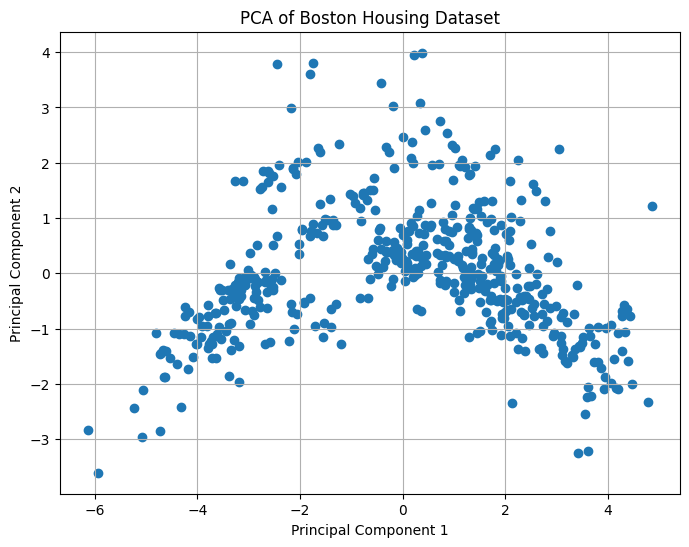

In [ ]:
#Task 7: Plot two principal components

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title('PCA of Boston Housing Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [ ]:
#Task 8: Vectorize Features and Target Together for Model Development

from pyspark.ml.feature import VectorAssembler

# Combine the PCA features with the original dataframe
df_pca_combined = df.join(df_pca.select('pca_features'))

# Extract the PCA columns into separate columns
df_pca_combined = df_pca_combined.withColumn("PC1", df_pca_combined.pca_features[0]) \
                                 .withColumn("PC2", df_pca_combined.pca_features[1])

# VectorAssembler to combine PCA features into a single vector column
assembler_final = VectorAssembler(inputCols=['PC1', 'PC2'], outputCol='features_final')
df_final = assembler_final.transform(df_pca_combined).select('features_final', 'medv')

# Show the final vectorized dataframe
df_final.show(5, truncate=False)

AnalysisException: Can't extract value from pca_features#2669: need struct type but got struct<type:tinyint,size:int,indices:array<int>,values:array<double>>;

In [ ]:
#Task 8: Vectorize Features and Target Together for Model Development

from pyspark.ml.feature import VectorAssembler

# Combine the PCA features with the original dataframe
df_pca_combined = df.join(df_pca.select('pca_features'))

# Extract the PCA columns into separate columns
# Use the correct method to extract elements from a VectorUDT
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType
extract_element = udf(lambda v, i: float(v[i]) if i < len(v) else None, DoubleType())
df_pca_combined = df_pca_combined.withColumn("PC1", extract_element(df_pca_combined.pca_features, lit(0))) \
                                 .withColumn("PC2", extract_element(df_pca_combined.pca_features, lit(1)))

# VectorAssembler to combine PCA features into a single vector column
assembler_final = VectorAssembler(inputCols=['PC1', 'PC2'], outputCol='features_final')
df_final = assembler_final.transform(df_pca_combined).select('features_final', 'medv')

# Show the final vectorized dataframe
df_final.show(5, truncate=False)

NameError: name 'lit' is not defined

In [ ]:
#Task 8: Vectorize Features and Target Together for Model Development

from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import udf, lit # Import the lit function
from pyspark.sql.types import DoubleType

# Combine the PCA features with the original dataframe
df_pca_combined = df.join(df_pca.select('pca_features'))

# Extract the PCA columns into separate columns
# Use the correct method to extract elements from a VectorUDT
extract_element = udf(lambda v, i: float(v[i]) if i < len(v) else None, DoubleType())
df_pca_combined = df_pca_combined.withColumn("PC1", extract_element(df_pca_combined.pca_features, lit(0))) \
                                 .withColumn("PC2", extract_element(df_pca_combined.pca_features, lit(1)))

# VectorAssembler to combine PCA features into a single vector column
assembler_final = VectorAssembler(inputCols=['PC1', 'PC2'], outputCol='features_final')
df_final = assembler_final.transform(df_pca_combined).select('features_final', 'medv')

# Show the final vectorized dataframe
df_final.show(5, truncate=False)

+---------------------------------------+----+
|features_final                         |medv|
+---------------------------------------+----+
|[2.0962230302385834,0.7723484263420729]|24.0|
|[2.0962230302385834,0.7723484263420729]|21.6|
|[2.0962230302385834,0.7723484263420729]|34.7|
|[2.0962230302385834,0.7723484263420729]|33.4|
|[2.0962230302385834,0.7723484263420729]|36.2|
+---------------------------------------+----+
only showing top 5 rows



In [ ]:
#Task 9: Split dataset into training and testing dataset

# Split dataset into training and testing sets
train_df, test_df = df_final.randomSplit([0.8, 0.2], seed=42)

print(f"Training Dataset Count: {train_df.count()}")
print(f"Testing Dataset Count: {test_df.count()}")


Training Dataset Count: 204660
Testing Dataset Count: 51376


In [ ]:
#Task 10: Fit model for Linear Regression


from pyspark.ml.regression import LinearRegression

# Initialize Linear Regression model
lr = LinearRegression(featuresCol='features_final', labelCol='medv')

# Fit the model on training data
lr_model = lr.fit(train_df)

In [ ]:
#Task 11: Find out Model Coefficients and Intercepts


# Print coefficients and intercept
print(f"Coefficients: {lr_model.coefficients}")
print(f"Intercept: {lr_model.intercept}")

Coefficients: [0.00148213019619194,-0.0119676364056683]
Intercept: 22.531082310270605


In [ ]:
#Task 12: Evaluate Model for Test Dataset


# Make predictions on test data
predictions = lr_model.transform(test_df)

# Show predictions alongside actual 'medv' values
predictions.select("medv", "prediction").show(5)

# Evaluate the model
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(labelCol='medv', predictionCol='prediction', metricName='rmse')
rmse = evaluator.evaluate(predictions)

print(f"Root Mean Squared Error (RMSE) on test data: {rmse}")

+----+------------------+
|medv|        prediction|
+----+------------------+
| 5.6|22.555808549084098|
| 7.2|22.555808549084098|
| 7.2|22.555808549084098|
| 8.3|22.555808549084098|
| 8.8|22.555808549084098|
+----+------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data: 9.179133194852131


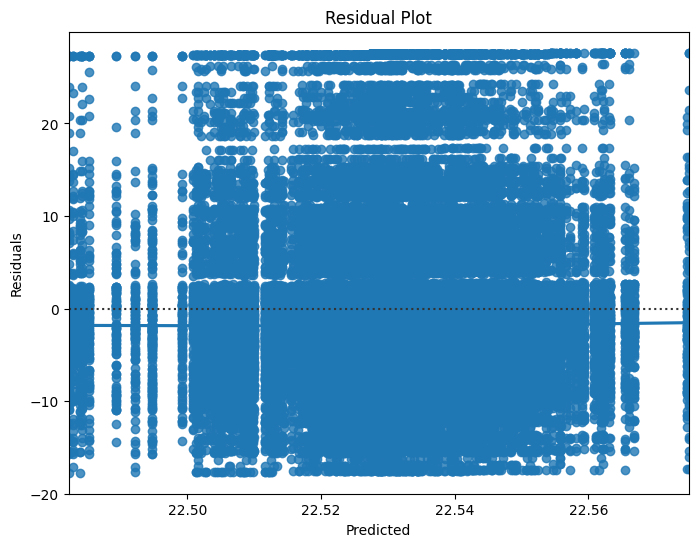

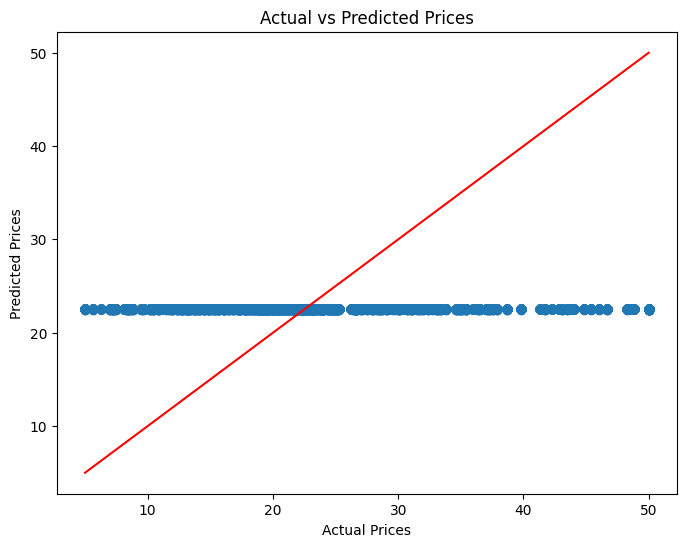

In [ ]:
#Task 13: Evaluate Model for Test Dataset


# Collect the predictions and actual values
predictions_pd = predictions.select("medv", "prediction").toPandas()

import matplotlib.pyplot as plt
import seaborn as sns

# Residual plot
plt.figure(figsize=(8, 6))
sns.residplot(x='prediction', y='medv', data=predictions_pd, lowess=True)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(predictions_pd['medv'], predictions_pd['prediction'])
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([min(predictions_pd['medv']), max(predictions_pd['medv'])], [min(predictions_pd['medv']), max(predictions_pd['medv'])], color='red')
plt.show()
